In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew # for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8")) # check the files available in the directory

analysis.ipynb
data_description.txt
house-prices-advanced-regression-techniques.zip
linear.ipynb
my_date.ipynb
my_work.ipynb
ridge_sol.csv
sample_submission.csv
test.csv
top4.ipynb
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./train.csv') # 训练数据
test = pd.read_csv('./test.csv') # 测试数据
##display the first five rows of the train dataset.
train.head(5)#查看前5行

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
##display the first five rows of the test dataset.
test.head(5)#查看测试数据前5行

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))#查看行列数

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']#保存id列

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)#删除id列

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))#查看删除id列后的行列数

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


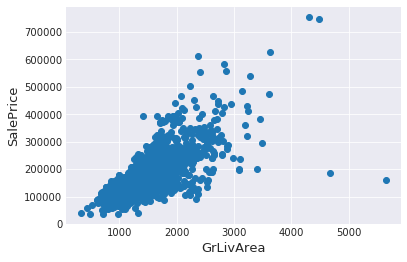

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()#画散点图，看房子地上生活区大小与房价的关系

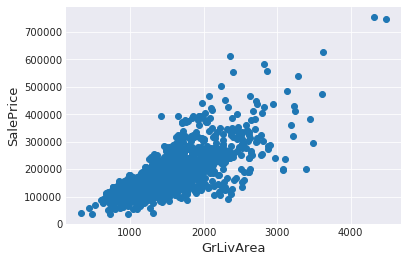

In [6]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()#去除异常点，查看散点图

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180932.92 and sigma = 79467.79



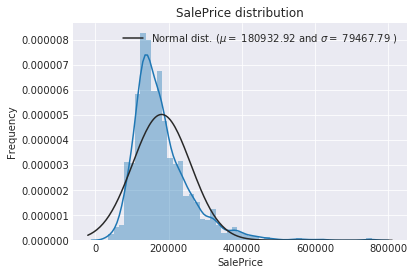

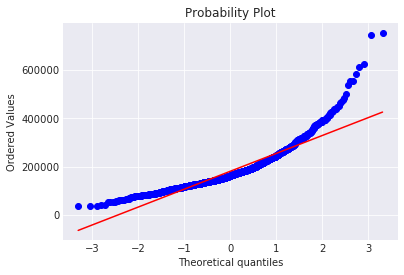

In [7]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()#查看label是否服从正态分布


 mu = 12.02 and sigma = 0.40



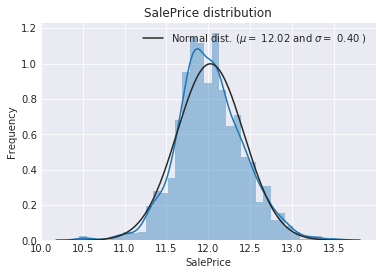

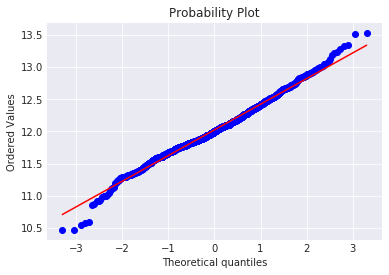

In [8]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"]) # 通过log1p()对label进行平滑

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']) # 计算正态分布的量参数
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best') # 添加图例
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt) # 画QQ图
plt.show()

In [9]:
ntrain = train.shape[0] #训练数据行数
ntest = test.shape[0] #测试数据行数
y_train = train.SalePrice.values #训练数据的label
all_data = pd.concat((train, test)).reset_index(drop=True) #合并训练测试数据，并重置索引
all_data.drop(['SalePrice'], axis=1, inplace=True) #删除label列，修改源数据
print("all_data size is : {}".format(all_data.shape)) #查看数据大小

all_data size is : (2917, 79)


In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 #计算各列的缺失率
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] #删除缺失率为0的统计结果，进行降序排序，取前30
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na}) #构建df
missing_data.head(20) #查看前20

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

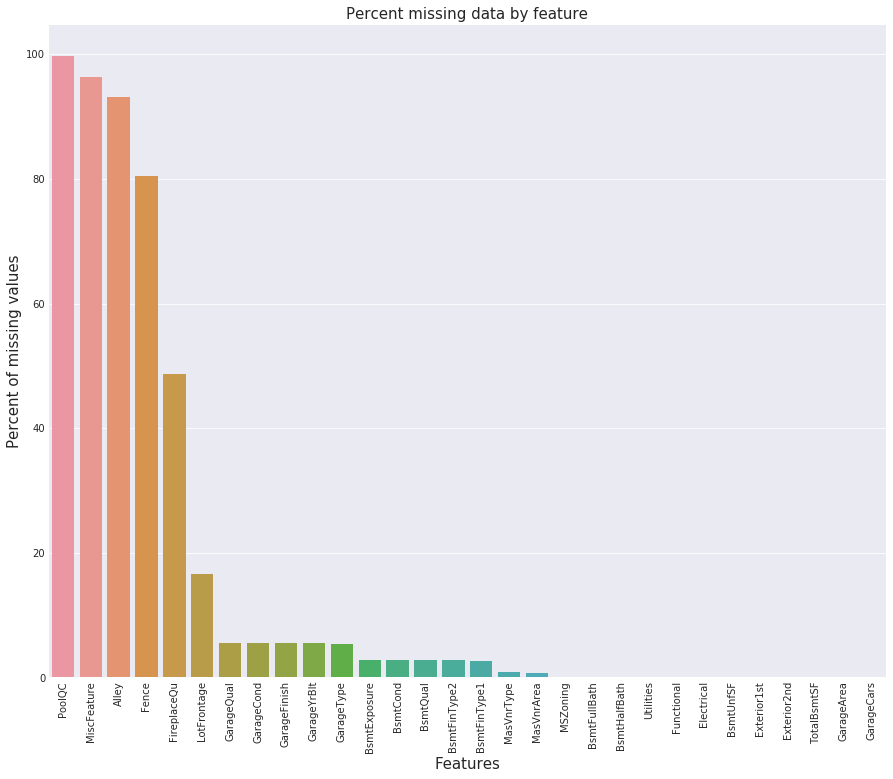

In [11]:
f, ax = plt.subplots(figsize=(15, 12)) #画布
plt.xticks(rotation='90') 
sns.barplot(x=all_data_na.index, y=all_data_na) #画缺失率条形图
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

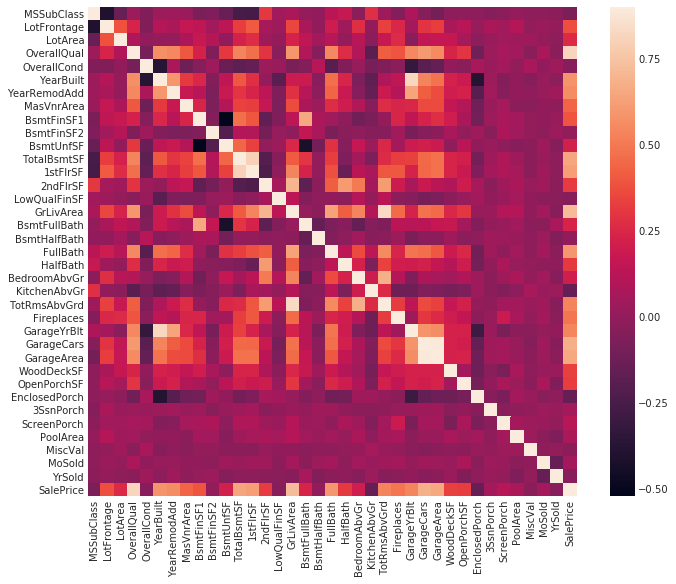

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr() #计算所有列之间的相关性矩阵
plt.subplots(figsize=(12,9)) #
sns.heatmap(corrmat, vmax=0.9, square=True) #根据相关性矩阵画热力图

In [13]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None") #泳池质量
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None") #其他类别中未涵盖的杂项功能
all_data["Alley"] = all_data["Alley"].fillna("None") #通道类型
all_data["Fence"] = all_data["Fence"].fillna("None") #围栏质量
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None") #壁炉质量

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform( 
    lambda x: x.fillna(x.median())) #邻居，临街地段

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'): #车库位置，车库内部装修，车库质量，车库条件
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): #车库建造年份，车库大小，容纳的车数
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): #类型1成品平方英尺，类型2成品平方英尺，地下室面积未完工平方英尺
    all_data[col] = all_data[col].fillna(0)#地下室总面积，地下室全浴室，地下室半浴室
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):# 地下室高度，地下室条件，室外或花园级地下室墙壁，地下室成品区质量，二次加工区域的质量（如有
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None") #砖石饰面类型
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0) #砖石饰面面积（平方英尺）

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0]) #分区总分类
all_data = all_data.drop(['Utilities'], axis=1) #可用工具类型
all_data["Functional"] = all_data["Functional"].fillna("Typ") #家庭功能评分
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) #电力系统

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) #厨房品质
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) #房屋外部覆盖物
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) #房屋外部覆盖物（如果不止一种材料）
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0]) #销售类型
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None") #建筑类

#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 # 统计缺失率
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)  # 删除缺失率为0的行，降序排序
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na}) #将缺失信息转成df
missing_data.head() #输出前几行



In [ ]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str) # apply(str)将该列转成str,applymap(str)将整改df数据都转成str


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str) # 强制类型转换, 整体状况评级


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str) # 年销售
all_data['MoSold'] = all_data['MoSold'].astype(str) # 月销售

In [14]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values)) # 对类别特征进行labelEncoder

# shape        
print('Shape all_data: {}'.format(all_data.shape)) # 打印数据行数列数

Shape all_data: (2917, 78)


In [15]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] # 创建新特征，总面积
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index # 获取数值型特征列索引

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) # 计算数值特征的偏度，降序排序
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [16]:
skewness = skewness[abs(skewness) > 0.75] # 获取偏度绝对值大于0.75的数据
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam) #对偏度较大的数据进行box_cox变换
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [17]:
all_data = pd.get_dummies(all_data) # one-hot编码
print(all_data.shape)

(2917, 220)


In [18]:
train = all_data[:ntrain] # 训练数据
test = all_data[ntrain:]  # 测试数据

In [19]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC # 加正则化的线性回归
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor # 随机森林回归，梯度提升回归
from sklearn.kernel_ridge import KernelRidge # 使用核技巧的岭回归，L2正则线性回归
from sklearn.pipeline import make_pipeline # 构建pipleline
from sklearn.preprocessing import RobustScaler # 标准化，可以避免异常值影响
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone # 估计器基类，转换器混合类，回归器混合类，克隆
from sklearn.model_selection import KFold, cross_val_score, train_test_split # K折，交叉验证，分割训练集测试集
from sklearn.metrics import mean_squared_error # 均方误差
import xgboost as xgb  
import lightgbm as lgb

In [20]:
#Validation function
n_folds = 5

def rmsle_cv(model):   # 交叉验证包装函数
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [21]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)) # 标准化，lasso训练

In [22]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)) # 标准化，ElasticNet训练

In [23]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) # 带核技巧的岭回归

In [24]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5) # 梯度提升回归

In [25]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1) # xgboost

In [26]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11) # LightGBM

In [27]:
score = rmsle_cv(lasso) # 交叉验证，训练lasso
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())) #  


Lasso score: 0.1115 (0.0074)



In [28]:
score = rmsle_cv(ENet) # 交叉验证，训练ENet
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [29]:
score = rmsle_cv(KRR) # 交叉验证，训练KRR
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [30]:
score = rmsle_cv(GBoost) # 交叉验证，训练GBoost
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [31]:
score = rmsle_cv(model_xgb) #交叉验证，训练XGBoost
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1155 (0.0070)



In [32]:
score = rmsle_cv(model_lgb) #交叉验证，训练lgb
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1157 (0.0065)



In [33]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin): # 融合模型，多个模型取均值
    def __init__(self, models): # 初始化
        self.models = models 
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  # 克隆模型
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y) # 循环训练模型

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([  # 合并结果
            model.predict(X) for model in self.models_  # 循环用各模型预测
        ])
        return np.mean(predictions, axis=1)   #结果取均值，axis=1对行取均值



In [34]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso)) 

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1091 (0.0075)



In [35]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5): # 初始化
        self.base_models = base_models   # 基础模型集，生成的预测结果，作为特征，放到第二层进行训练
        self.meta_model = meta_model     # 核心模型，用于第二层训练
        self.n_folds = n_folds           # 交叉验证的折数
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):  # 训练
        self.base_models_ = [list() for x in self.base_models] # 基础模型？？？？？，初始化[[],[],[]]用于下面存基础模型，因为交叉验证，所以需要多个list存不同的基础模型集
        self.meta_model_ = clone(self.meta_model)  #克隆核心模型
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156) # 设置交叉验证参数
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) # 初始化二维列表，用于存预测结果，样本数*基础模型集大小
        for i, model in enumerate(self.base_models):  # 遍历基于模型集，i行索引，model基础模型，注意区分：self.base_models_ 这时只是空容器，self.base_models基础模型集
            for train_index, holdout_index in kfold.split(X, y): # 训练集，验证集，就是交叉验证的过程
                instance = clone(model) # 复制基础模型
                self.base_models_[i].append(instance) # 将基础模型加入容器对应的行
                instance.fit(X[train_index], y[train_index]) # 训练基础模型
                y_pred = instance.predict(X[holdout_index]) # 使用基础模型进行预测
                out_of_fold_predictions[holdout_index, i] = y_pred 
                # 将预测结果加入容器，每一列是一个模型的预测结果，行元素就是交叉验证的结果，k折交叉验证后，每个样本都会有一个预测值，直接作为下一层的输入特征
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y) # 使用核心模型进行第二层训练，特征为基础模型集交叉验证的输出
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) # 将多个基础模型的结果进行合并
            for base_models in self.base_models_ ]) # 每次取一个基础模型经过交叉验证生成的多个模型，进行循环预测，结果取均值
            # self.base_models_中每一行都是同一个基础模型，通过交叉验证生成的多个模型。
            # [[l_1, l_2, l_3],
            #  [x_1, x_2, x_3],
            #  [y_1, y_2, y_3]
            # ]
            # 
        return self.meta_model_.predict(meta_features) 
        #使用核心模型进行预测，特征为多个基础模型的预测结果(每个结果都是每个基础模型，经交叉验证生成的多个模型预测结果的均值)
        #样本数*基础模型数，每列是一个基础模型的预测结果


In [36]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)   # 构造stack模型

score = rmsle_cv(stacked_averaged_models)  # 使用交叉验证进行测试
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1084 (0.0074)


In [37]:
def rmsle(y, y_pred): #评价函数，计算均方根误差
    return np.sqrt(mean_squared_error(y, y_pred))  

stacked_averaged_models.fit(train.values, y_train)   #使用stack模型训练
stacked_train_pred = stacked_averaged_models.predict(train.values) #使用stack模型预测，在训练集上进行预测
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values)) #在测试集上预测，然后对预测结果进行还原 #np.expm1()是np.log1p()的逆运算，还原预测结果
print(rmsle(y_train, stacked_train_pred))  #计算均方根误差，注意：是在训练集上计算误差，相当于判断模型的学习情况

0.07814905151549119


In [38]:
model_xgb.fit(train, y_train) # xgb训练
xgb_train_pred = model_xgb.predict(train) #  xgb在训练集上预测
xgb_pred = np.expm1(model_xgb.predict(test)) # xgb在测试集上预测， 并还原预测结果
print(rmsle(y_train, xgb_train_pred))   # 在训练集上计算均方根误差

0.0810695205819717


In [39]:
model_lgb.fit(train, y_train)     # lgb训练
lgb_train_pred = model_lgb.predict(train)  # 在训练集上预测
lgb_pred = np.expm1(model_lgb.predict(test.values)) # 在测试集上预测，并还原预测结果
print(rmsle(y_train, lgb_train_pred)) # 在训练集上计算均方根误差

0.0715134429831827


In [40]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))  # 在训练集上进行模型结果融合，加权求和

RMSLE score on train data:
0.07555839398243268


In [41]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15  # 在测试集上对多个模型的预测结果进行融合，加权求和

In [42]:
sub = pd.DataFrame()  # 创建空df
sub['Id'] = test_ID    # 赋值id
sub['SalePrice'] = ensemble  # 赋值预测结果
sub.to_csv('submission.csv',index=False) # 存入csv